In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import networkx as nx

In [2]:
import os
from matplotlib import font_manager as fm

font_file = "../폰트 파일/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

- 처음~2020.4월 : 거리두기 시작
- 2020.5월 : 생활방역 전환
- 2020.6월~8월 : 수도권 2단계
- 2020.9월 : 2.5단계 강화
- ~~2020.9월 : 거리두기 2단계로 하향~~
- 2020.10월 : 1단계 하향
- 2020.11월 : 정밀방역으로 세분화
- 2020.12월 : 2단계 시행
- ~~2020.12월 : 2.5단계 시행~~

+ 2021.1월~2월 : 2.5단계, 조치 완화
+ ~~2021.2월 : 2단계 완화~~
+ 2021.3월~6월 : 거리두기 개편
+ 2021.07월 거리두기 4단계

- 2022.8월~4월?? : 거리두기 해제?

In [3]:
with open("../참고 데이터/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]
newdata

,소분류,읍면동
0,1101053,사직동
1,1101054,삼청동
2,1101055,부암동
3,1101056,평창동
4,1101057,무악동
...,...,...
410,1125070,둔촌1동
411,1125071,둔촌2동
412,1125072,암사1동
413,1125073,천호2동


In [6]:
# 2020년 4월까지
from os import listdir
import pandas as pd

filenames0 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202001/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202001/")]
filenames1 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202002/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202002/")]
filenames2 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202003/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202003/")]
filenames3 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202004/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202004/")]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1], 
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1] + [pd.read_csv(f, encoding='cp949') for f in filenames2] + [pd.read_csv(f, encoding='cp949') for f in filenames3]
data = pd.concat(yo, 
                ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = ['금천구','종로구','양천구','용산구','도봉구','성동구','중구','구로구','서대문구','중랑구','강북구','동대문구','광진구','동작구','은평구','서초구','영등포구','강동구','성북구','강서구','노원구','관악구','마포구','송파구','강남구']

# 4개달 데이터 합치고 쓱싹쓱싹한게 6분 51.9초

35504760
도착 시군구 코드
금천구     24537510
도봉구     27820040
양천구     28811990
강북구     31260890
구로구     31520480
중랑구     31771220
은평구     32231760
강동구     33523210
동작구     33616410
서대문구    33723690
광진구     33770760
용산구     33818870
성동구     34550120
관악구     35556980
동대문구    35704140
종로구     36329050
노원구     36374590
성북구     36552090
강서구     36637800
영등포구    37137950
중구      37322430
마포구     38613370
서초구     40829520
송파구     40919990
강남구     46236680
Name: 평균 이동 시간(분), dtype: int64


# 재정렬

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


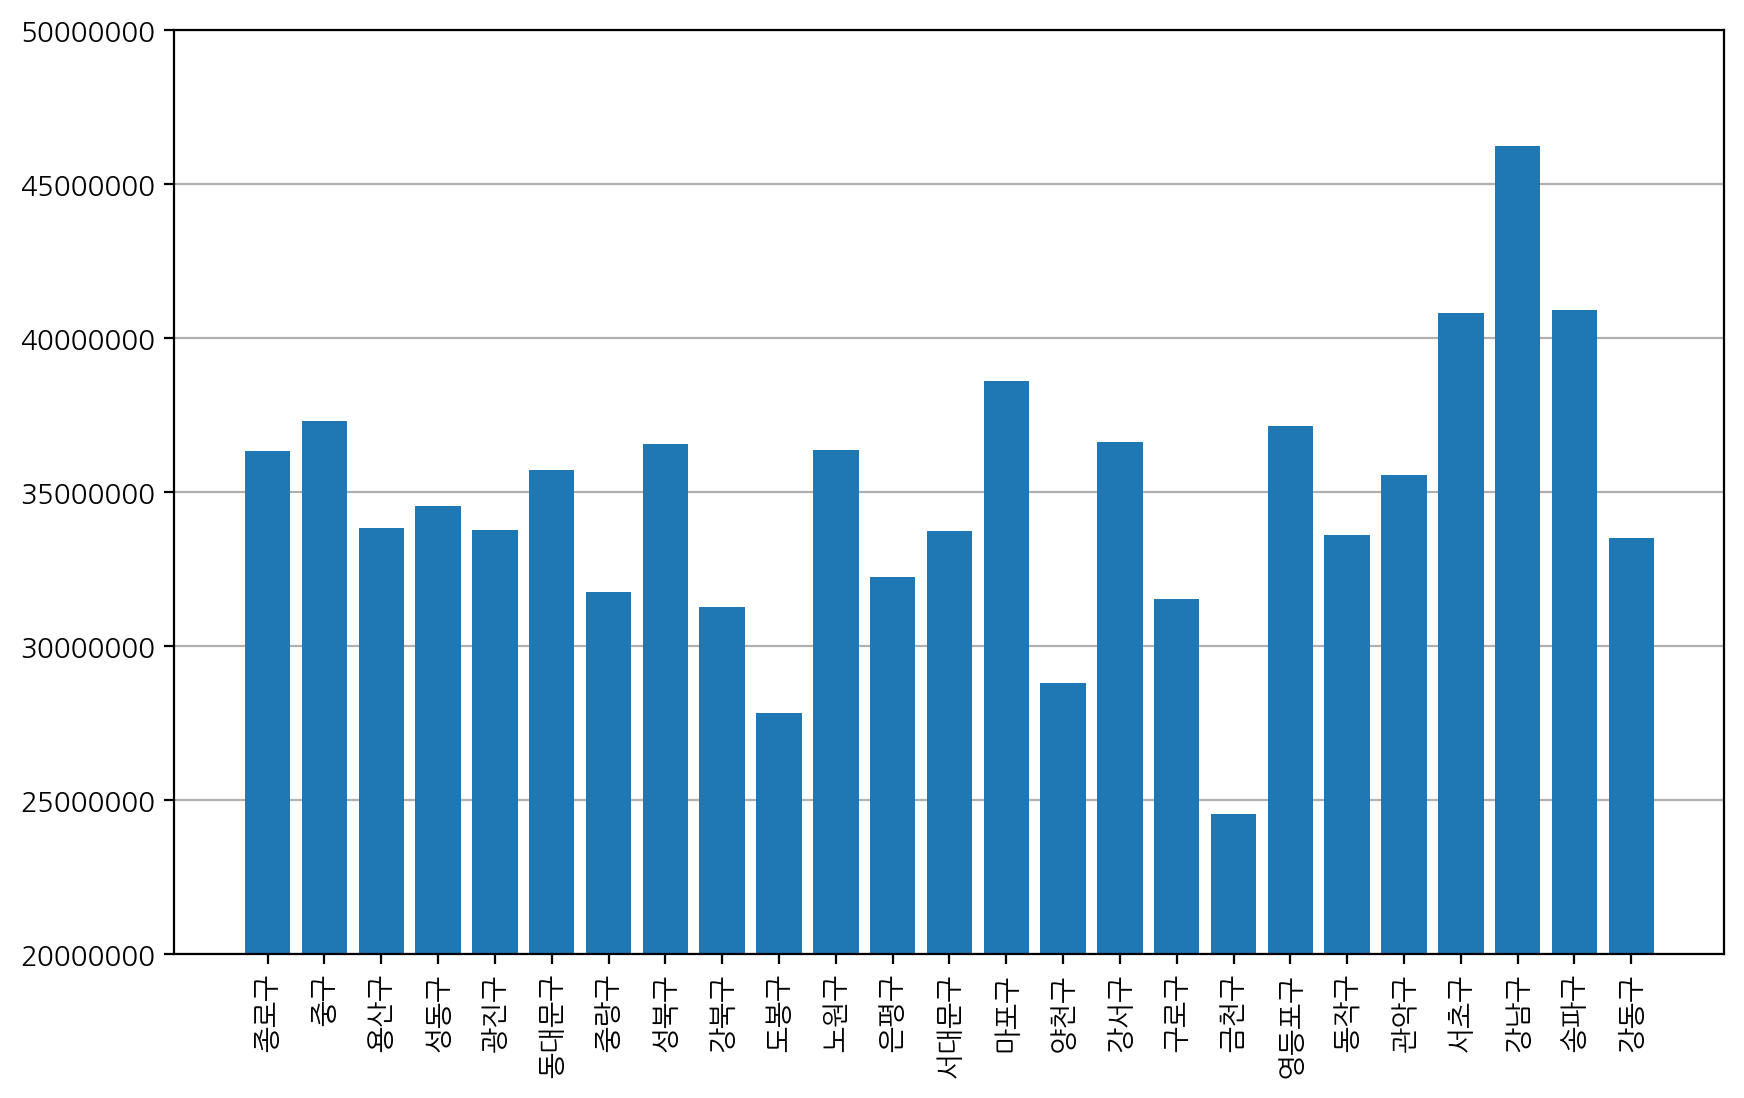

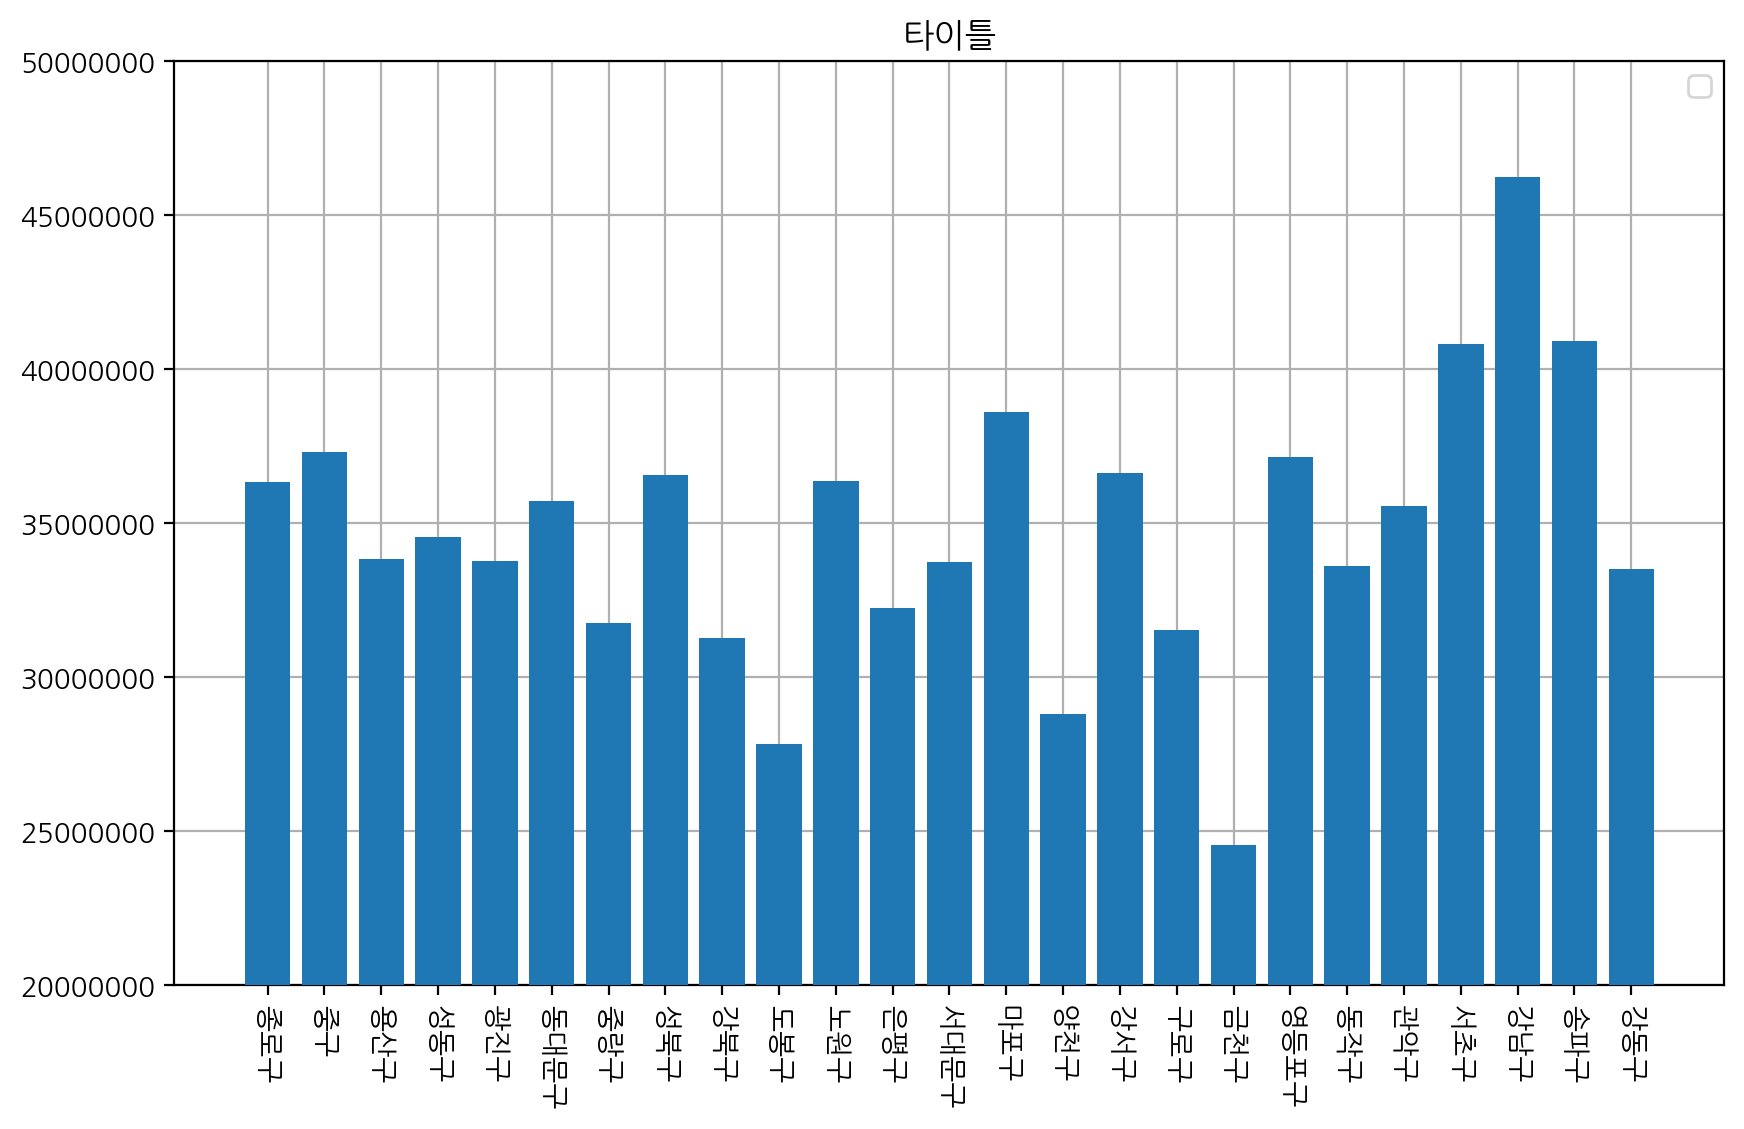

In [58]:
data2point5.중랑구
d = data2point5
x = ['종로구', '중구', '용산구','성동구','광진구','동대문구','중랑구',
 '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구',
    '마포구', '양천구', '강서구', '구로구', '금천구','영등포구','동작구',
    '관악구','서초구','강남구','송파구','강동구']
y = [d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구,  d.도봉구 ,
d.노원구,  d.은평구,  d.서대문구, d.마포구, d.양천구,  d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구, d.관악구,
d.서초구, d.강남구, d.송파구, d.강동구 ]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.grid(axis='y')
ax.bar(x,y)
ax.set_ylim(20000000,50000000)
ax.set_xticks(range(25),x,rotation=90)
ax.ticklabel_format(style='plain',axis='y') 

plt.figure(figsize=(10,6))
plt.ylim(20000000,50000000)
plt.grid(zorder=0)
ax.set_axisbelow(True)
plt.bar(x, y, zorder=3)
plt.xticks(range(25), x, rotation=180+90)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

plt.title("타이틀")
plt.savefig("../작업 결과물/소중한 그래프(2021년 1~4월 도착인구 뭉탱이).png", dpi=96)
plt.show()


# ㅁㄴㅇㄹ

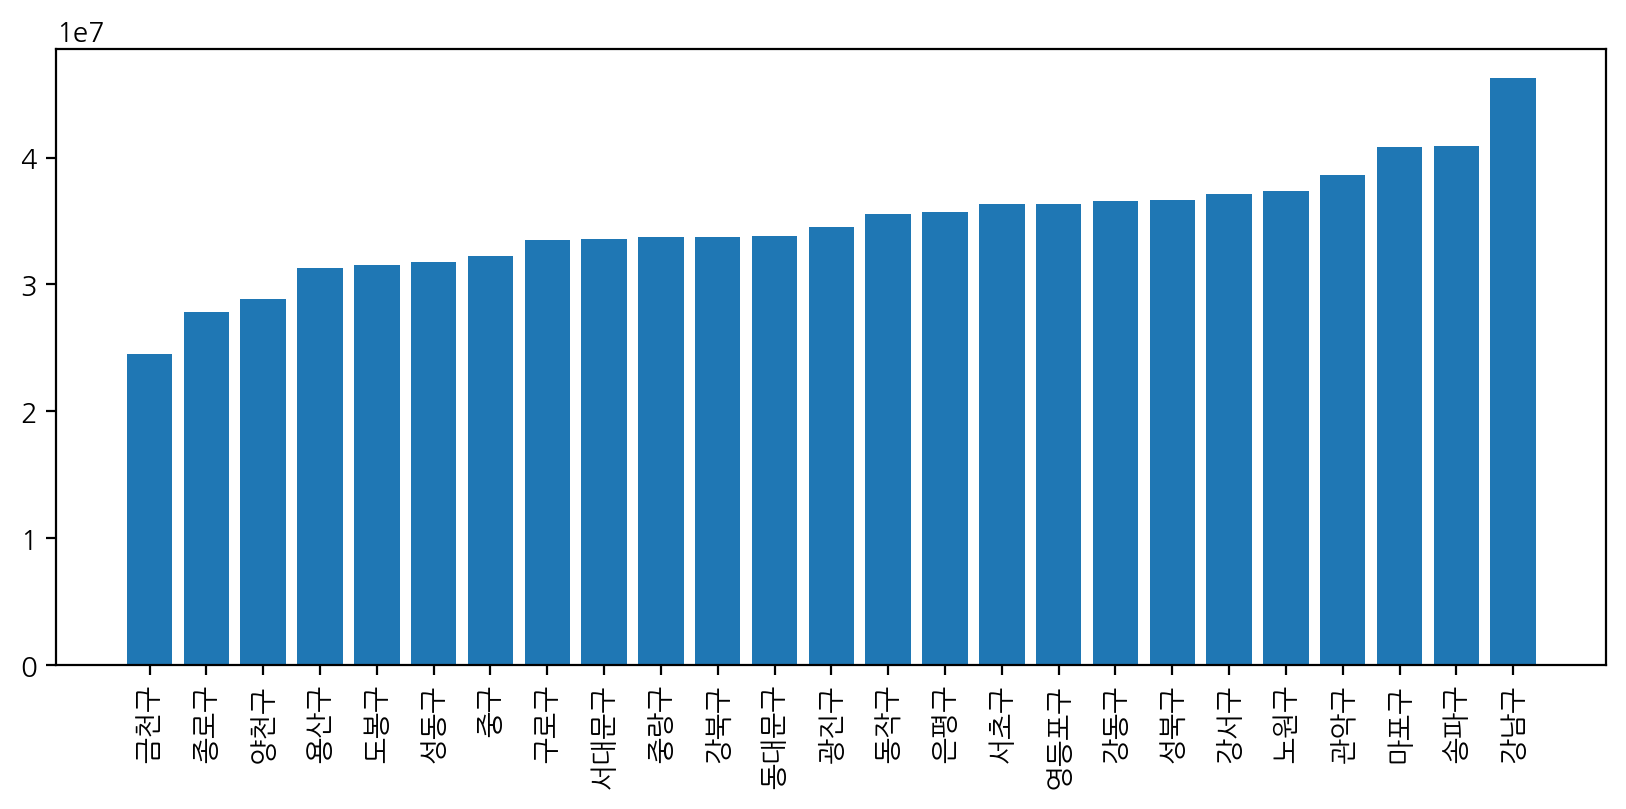

In [8]:
plt.figure(figsize=(10,4))
plt.bar(regions, data2point5)
plt.xticks(range(25), regions, rotation=90)
plt.savefig("../작업 결과물/소중한 그래프(2021년 1~4월 도착인구 뭉탱이).png", dpi=96)
plt.show()
종로,
 종구, 
 용산구, 
 성동구, 
 광진구, 
 동대문구, 
 중랑구, 
 성북구, 
 강북구, 
 구로구, 
 금천구, 
 영등포구, 
 동작구, 
 관악구, 
 서주구, 
 강남구, 
 송파구, 
 강동구

In [ ]:
# 2020년 6월에서 8월까지

In [ ]:
# 2021년 1월에서 2월까지

In [ ]:
# 2021년 3월에서 6월까지